      CREDIT CARD SPENDING PREDICTIONS (2025)
October prediction:  $1,112.53
November prediction: $1,100.43
December prediction: $1,088.34

Model Quality (R² score): 0.028
Monthly trend: $-12.09 per month
Base spending: $1,233.46

Actual Spending (Jan-Sep 2025):
  Average: $1,172.99
  Minimum: $930.83 (April)
  Maximum: $1,388.47 (August)
  Std Dev: $186.16


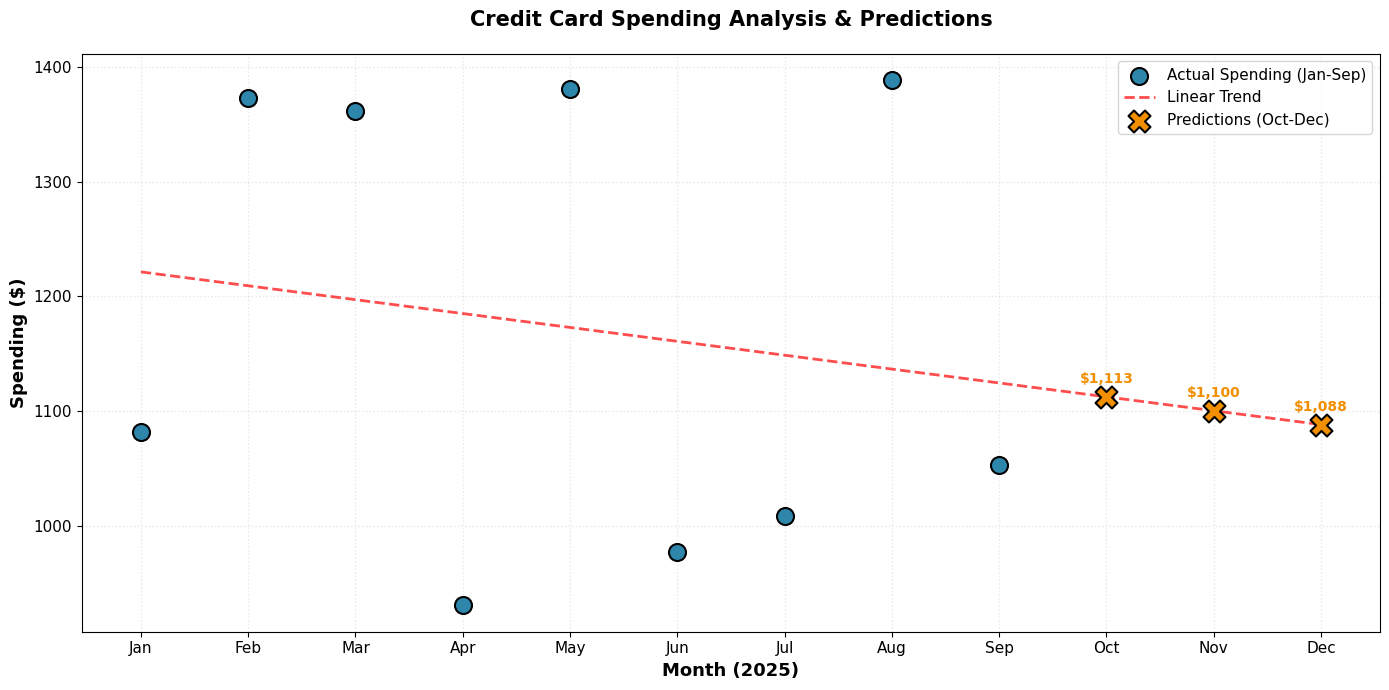


✅ Model training and predictions complete!


In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Your data (Jan-Sep, excluding incomplete October)
months = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
spend = np.array([1081.63, 1373.16, 1361.86, 930.83, 1381.10, 
                  977.25, 1009.13, 1388.47, 1053.51])

# Train the model
model = LinearRegression()
model.fit(months, spend)

# Predict October, November, and December
future = np.array([[10], [11], [12]])
predictions = model.predict(future)

# Print results
print("=" * 55)
print("      CREDIT CARD SPENDING PREDICTIONS (2025)")
print("=" * 55)
print(f"October prediction:  ${predictions[0]:,.2f}")
print(f"November prediction: ${predictions[1]:,.2f}")
print(f"December prediction: ${predictions[2]:,.2f}")
print("=" * 55)

# Model performance
print(f"\nModel Quality (R² score): {model.score(months, spend):.3f}")
print(f"Monthly trend: ${model.coef_[0]:.2f} per month")
print(f"Base spending: ${model.intercept_:,.2f}")

# Summary of actual data
print(f"\nActual Spending (Jan-Sep 2025):")
print(f"  Average: ${np.mean(spend):,.2f}")
print(f"  Minimum: ${np.min(spend):,.2f} (April)")
print(f"  Maximum: ${np.max(spend):,.2f} (August)")
print(f"  Std Dev: ${np.std(spend):,.2f}")

# Visualization
plt.figure(figsize=(14, 7))

# Plot actual spending
plt.scatter(months, spend, label='Actual Spending (Jan-Sep)', 
           color='#2E86AB', s=150, zorder=3, edgecolors='black', linewidth=1.5)

# Plot trend line
all_months = np.array(range(1, 13)).reshape(-1, 1)
plt.plot(all_months, model.predict(all_months), 
         label='Linear Trend', color='red', linestyle='--', 
         alpha=0.7, linewidth=2)

# Plot predictions
plt.scatter([10, 11, 12], predictions, 
           label='Predictions (Oct-Dec)', color='#F18F01', 
           marker='X', s=250, zorder=3, edgecolors='black', linewidth=1.5)

# Add value labels on predictions
for i, (month, pred) in enumerate(zip([10, 11, 12], predictions)):
    plt.annotate(f'${pred:,.0f}', 
                xy=(month, pred), 
                xytext=(0, 10), 
                textcoords='offset points',
                ha='center',
                fontsize=10,
                fontweight='bold',
                color='#F18F01')

# Formatting
plt.xlabel('Month (2025)', fontsize=13, fontweight='bold')
plt.ylabel('Spending ($)', fontsize=13, fontweight='bold')
plt.title('Credit Card Spending Analysis & Predictions', 
         fontsize=15, fontweight='bold', pad=20)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3, linestyle=':', linewidth=1)
plt.xticks(range(1, 13), 
          ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
          fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

print("\n✅ Model training and predictions complete!")



## **What to expect when you run this:**

### **1. Predictions will print:**
#Something like:
#```
#October prediction:  $1,180.23
#November prediction: $1,175.45
#December prediction: $1,170.67

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

spend = np.array([1081.63, 1373.16, 1361.86, 930.83, 1381.10, 
                  977.25, 1009.13, 1388.47, 1053.51])

# Method 1: Original (month number)
months = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
model1 = LinearRegression()
model1.fit(months, spend)
r2_method1 = model1.score(months, spend)

# Method 2: Previous month predicts current
X_lag = spend[:-1].reshape(-1, 1)  # Months 1-8
y_lag = spend[1:]                   # Months 2-9
model2 = LinearRegression()
model2.fit(X_lag, y_lag)
r2_method2 = model2.score(X_lag, y_lag)

print("COMPARISON:")
print(f"Method 1 (month number) R²: {r2_method1:.3f}")
print(f"Method 2 (previous month) R²: {r2_method2:.3f}")
print(f"\nImprovement: {((r2_method2 - r2_method1) / r2_method1 * 100):.1f}%")

# Predict October using Method 2
oct_pred = model2.predict([[1053.51]])  # Based on September
print(f"\nOctober prediction (Method 2): ${oct_pred[0]:.2f}")

COMPARISON:
Method 1 (month number) R²: 0.028
Method 2 (previous month) R²: 0.244

Improvement: 766.4%

October prediction (Method 2): $1251.52
